# Notebook 4: Pandas and TF binding site analysis

Here we will start using Pandas. Pandas is the standard way of working with columnar data. However, there is a substantial learning curve. If you want to learn more about Pandas, here is a useful site: http://pandas.pydata.org/

Here we will use Pandas to analyze transcription factor (TF) binding sites from *Escherichia coli*. We will first focus on CRP, a major regulator in *E. coli* with over 350 functional binding sites.  

## Installation and downloads

In [1]:
!pip -q install palmerpenguins
!pip -q install logomaker

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


## Introduction

Pandas is a library for working with tabular data. It was orignally based on the R data.frame library, but with a slightly different grammer and some different functionality. 

There are two main types of objects in Pandas.

1)`Dataframe`

In [2]:
from palmerpenguins import load_penguins
df = load_penguins()
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


* A 2-D object
* Has row (index) and column names
* The orientation of rows vs columns matters a lot
* Generally, you want features as columns and observations as rows
* Features are variables, they are the things you measure, whether that be quantitatively or qualitatively. While observations are each data point, in this case it is each penguin

2) `pd.Series`


In [3]:
series = df['species']
print(type(series))
series

<class 'pandas.core.series.Series'>


0         Adelie
1         Adelie
2         Adelie
3         Adelie
4         Adelie
         ...    
339    Chinstrap
340    Chinstrap
341    Chinstrap
342    Chinstrap
343    Chinstrap
Name: species, Length: 344, dtype: object

* A single column of data
* Contains rownames but no column name, the rownames are always reffered to as `pd.Series.index`
* Can have an attribute `pd.Series.name` that can serve as the column name
* Works a lot like a python dictionary


### Things we need to learn 
1) How to create a pandas object/ read data in

2) How to subset your data

3) How to manipulate/mutate your data to create more data

4) How to Summarize or aggregate your data



## Preparing Code 1

In [2]:
# Put this first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import logomaker; we will use this later for visualizing TF motifs.
import logomaker 

In [5]:
# We will be analyzing a standing database of TF binding sites, which is available on RegulonDB. 
# Here is a command for downloading this file (this didn't work in lecture 1)
!mkdir data 
!wget -O ./data/binding_site_db.txt http://regulondb.ccg.unam.mx/menu/download/datasets/files/BindingSiteSet.txt 

mkdir: data: File exists
--2022-06-23 02:36:27--  http://regulondb.ccg.unam.mx/menu/download/datasets/files/BindingSiteSet.txt
Resolving regulondb.ccg.unam.mx (regulondb.ccg.unam.mx)... 132.248.34.160
Connecting to regulondb.ccg.unam.mx (regulondb.ccg.unam.mx)|132.248.34.160|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 982656 (960K) [text/plain]
Saving to: ‘./data/binding_site_db.txt’

./data/binding_site 100%[===================>] 959.62K   295KB/s    in 3.3s    

2022-06-23 02:36:31 (295 KB/s) - ‘./data/binding_site_db.txt’ saved [982656/982656]



In [6]:
# Let's see what this database looks like
!head -n 50 data/binding_site_db.txt

# Copies and Copyright-Notice
#
#      RegulonDB is free for academic/noncommercial use
#
#      User is not entitled to change or erase data sets of the RegulonDB
#      database or to eliminate copyright notices from RegulonDB. Furthermore,
#      User is not entitled to expand RegulonDB or to integrate RegulonDB partly
#      or as a whole into other databank systems, without prior written consent
#      from CCG-UNAM.
#
#      Please check the license at http://regulondb.ccg.unam.mx/menu/download/full_version/terms_and_conditions.jsp
#
# Citation
#
#      Santos-Zavaleta A et al. (2019). RegulonDB v 10.5: tackling challenges to unify classic and high throughput knowledge of gene regulation in E. coli K-12.,
#      Nucleic Acids Res. 2019 Jan 8;47(D1):D212-D220. doi: 10.1093/nar/gky1077.
#
#
# Contact
#
#      Person: RegulonDB Team
#      Web Page: http://regulondb.ccg.unam.mx/menu/about_regulondb/contact_us/index.jsp
#          (regulondb@ccg.unam.mx)
#
#
# Release: 10.10 Date: 02

## Reading data

When you store your data as a file you can use one of the `pd.read_*` functions to read in data from a variety of different file types

Then to save your progress you can write using `pd.DataFrame.write_*`


There are quite a lot of file types, and they all have their pros/cons. The simpliest and most commonly used one is `.csv`. 

In [3]:
# To parse this file, use Pandas's method read_csv. 
df = pd.read_csv("data/binding_site_db.txt", sep='\t', comment='#', header=None)
type(df)

pandas.core.frame.DataFrame

In [4]:
# To check that the data has been properly loaded, call the method df.head()
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,ECK125286586,AccB,AccB,ECK125258258,NaN,NaN,forward,ECK125257898,ECK120009421,accBC,-,accBp1,NaN,NaN,NaN,"[GEA|W|Gene expression analysis],[IMP|W|Inferr...",Weak,expression |,binding in vitro
1,ECK120015994,AcrR,AcrR,ECK125202663,1619048.0,1619058.0,forward,ECK125202664,ECK120009381,marRAB,-,marRp,-40.5,catcggtcaaTTCATTCATTTgacttatact,-67.5,[GEA|W|Gene expression analysis],Weak,expression,binding in vitro | computational prediction
2,ECK120015994,AcrR,AcrR,ECK125242724,1978422.0,1978432.0,reverse,ECK125242725,ECK120009328,flhDC,-,flhDp,-31.5,agcccccctcCGTTGTATGTGcgtgtagtga,-229.5,[GEA|W|Gene expression analysis],Weak,expression,computational prediction
3,ECK120015994,AcrR,AcrR,ECK120035040,2313112.0,2313135.0,forward,ECK120035041,ECK120008981,micF,-,micFp1,41.0,atttattaccGTCATTCATTTCTGAATGTCTGTTtacccctatt,41.0,NaN,NaN,NaN,computational prediction
4,ECK120015994,AcrR,AcrR,ECK120035040,2313112.0,2313135.0,forward,ECK125301110,ECK125300413,micF,-,micFp2,41.0,atttattaccGTCATTCATTTCTGAATGTCTGTTtacccctatt,41.0,NaN,NaN,NaN,computational prediction


In [5]:
# You get the number of rows and columns from the attribute df.shape
df.shape

(4201, 19)

In [6]:
# We only want the TF name (column 1) and the TF binding site sequence (column 11)
# To keep only these columns, index the df using a list of column names you want (in the order you want)
col_names = [1,13]
df = df[col_names]
df.head()

,1,13
0,AccB,NaN
1,AcrR,catcggtcaaTTCATTCATTTgacttatact
2,AcrR,agcccccctcCGTTGTATGTGcgtgtagtga
3,AcrR,atttattaccGTCATTCATTTCTGAATGTCTGTTtacccctatt
4,AcrR,atttattaccGTCATTCATTTCTGAATGTCTGTTtacccctatt


In [7]:
# Data frames allow users to give columns meaningful names.
# To rename the columns, set df.columns to a list of the desired names.
df.columns = ['tf','site']
df.head()

,tf,site
0,AccB,NaN
1,AcrR,catcggtcaaTTCATTCATTTgacttatact
2,AcrR,agcccccctcCGTTGTATGTGcgtgtagtga
3,AcrR,atttattaccGTCATTCATTTCTGAATGTCTGTTtacccctatt
4,AcrR,atttattaccGTCATTCATTTCTGAATGTCTGTTtacccctatt


In [8]:
# We see that some TF sites are listed as NaN. 
# Let's use the dropna() method to get rid of these rows.
df = df.dropna()
df.head()

,tf,site
1,AcrR,catcggtcaaTTCATTCATTTgacttatact
2,AcrR,agcccccctcCGTTGTATGTGcgtgtagtga
3,AcrR,atttattaccGTCATTCATTTCTGAATGTCTGTTtacccctatt
4,AcrR,atttattaccGTCATTCATTTCTGAATGTCTGTTtacccctatt
5,AcrR,ataattcctcAAGTTAACTTGaggtaaagcg


In [9]:
# Note that the last three modifications of df can be accomplished in one line 
df = pd.read_csv("data/binding_site_db.txt", sep='\t', comment='#',
                 header=None, usecols=[1,13], names=['tf','site']).dropna()
df.head()

,tf,site
1,AcrR,catcggtcaaTTCATTCATTTgacttatact
2,AcrR,agcccccctcCGTTGTATGTGcgtgtagtga
3,AcrR,atttattaccGTCATTCATTTCTGAATGTCTGTTtacccctatt
4,AcrR,atttattaccGTCATTCATTTCTGAATGTCTGTTtacccctatt
5,AcrR,ataattcctcAAGTTAACTTGaggtaaagcg


In [10]:
# Check out the pd.read_csv() documentation for a full list
pd.read_csv?

In [11]:
# Dataframe columns are called 'Series' objects. 
# Essentially, they're numpy arrays with some extra structure.
col = df['tf']
col.head()

1    AcrR
2    AcrR
3    AcrR
4    AcrR
5    AcrR
Name: tf, dtype: object

In [13]:
# You can extract an element from a dataframe by using .loc[]
df.loc[3,'site']

'atttattaccGTCATTCATTTCTGAATGTCTGTTtacccctatt'

Our goal is to generate sequence logos that represents the binding preferences of TFs in this database.  As a concrete example we'll use CRP, which has a well-characterized binding motif shown here:

<img src="https://github.com/bharris12/URP_2021_Programming_Course/blob/main/lecture_3/data/crp_information_logo.png?raw=1" alt="Drawing" style="width: 700px;"/>

## Subsetting dataframe


In [17]:
# Choose a TF
tf = 'CRP'

# Flag which rows in the dataframe have the correct TF name
flags = (df['tf']==tf)
flags

1       False
2       False
3       False
4       False
5       False
        ...  
4196    False
4197    False
4198    False
4199    False
4200    False
Name: tf, Length: 3647, dtype: bool

In [18]:
# Grab those rows. To be safe use copy() to make sure that, if we
# alter tf_df, df itself doesn't change
tf_df = df[flags].copy()
tf_df.head()

,tf,site
356,CRP,tgcggaaaaaTTTGTTCCTCTTCACATtttttgtaca
357,CRP,tttttttcatATGCCTGACGGAGTTCACACTTgtaagttttc
358,CRP,tgctaaaaacCATTGTTATTAGTCTCACACTTTtttattggta
359,CRP,aggtgcaaccGCAAAAAATGTGAGAGAGTGCAacctgatgaa
360,CRP,caacctgatgAAAAATAGTGTCGCTGAGCACTaaaatttaat


Selecting rows by a boolean vector, like `flags` is basically the only way I ever subset my rows. When you store rows as observations this is generally the case because you usually are **filtering** the rows based on a specific feature.

### All the ways to subset DataFrames

#### Rows
By boolean : `df[BOOLEAN_VECTOR]` 

By name : `df.loc[LIST_OF_ROW_NAMES, :]`

By Location : `df.iloc[LIST_OF_INTEGERS, :]`



With a function `df.query('COLUMMN==value')` (This one is quite advanced, see [this tutorial for more](https://www.sharpsightlabs.com/blog/pandas-query/))
#### Columns
By boolean : `df.loc[:,BOOLEAN_VECTOR]`

By name** : `df[LIST_OF_COLUMN_NAMES]`

By Location : `df.iloc[:,LIST_OF_INTEGERS]`

With a function : `df.filter(LOTS_OF_OPTIONS)` (This one is quite advanced, see [this tutorial for more](https://www.sharpsightlabs.com/blog/pandas-filter/))

In [19]:
# Each DNA binding site should be capitalized.
# To do this, we reset 'site' column of tf_df

# Get list of capitalized sites and replace the 'site' column with this
capitalized_sites = [site.upper() for site in tf_df['site']]
tf_df['site'] = capitalized_sites
tf_df.head()

,tf,site
356,CRP,TGCGGAAAAATTTGTTCCTCTTCACATTTTTTGTACA
357,CRP,TTTTTTTCATATGCCTGACGGAGTTCACACTTGTAAGTTTTC
358,CRP,TGCTAAAAACCATTGTTATTAGTCTCACACTTTTTTATTGGTA
359,CRP,AGGTGCAACCGCAAAAAATGTGAGAGAGTGCAACCTGATGAA
360,CRP,CAACCTGATGAAAAATAGTGTCGCTGAGCACTAAAATTTAAT


In [20]:
# In order to derive a motif, all sites we analyze need to be the same length.
# It's good to check that this is actually the case.
# We therefore add a column to tf_df listing the length of each site

# Compute the length of each site and record this in a 'length' column
site_lengths = [len(site) for site in tf_df['site']]
tf_df['length'] = site_lengths
tf_df.head()

,tf,site,length
356,CRP,TGCGGAAAAATTTGTTCCTCTTCACATTTTTTGTACA,37
357,CRP,TTTTTTTCATATGCCTGACGGAGTTCACACTTGTAAGTTTTC,42
358,CRP,TGCTAAAAACCATTGTTATTAGTCTCACACTTTTTTATTGGTA,43
359,CRP,AGGTGCAACCGCAAAAAATGTGAGAGAGTGCAACCTGATGAA,42
360,CRP,CAACCTGATGAAAAATAGTGTCGCTGAGCACTAAAATTTAAT,42


## Exercises, part 1

**E4.1.** Use the `unique()` method to find how many different length exists for the TF binding sites.

In [21]:
# Answer here

**E4.2.** Apparently these sites have a bunch of different lengths. For a better understanding of this, write a `for` loop to determine how many sites there are of each length.

In [22]:
# Answer here

## Part 2

In [23]:
# Use value_counts() to see how many sites of each length there are. 
tf_df['length'].value_counts()

42    351
43     71
37     11
44      5
38      2
32      1
34      1
36      1
39      1
40      1
41      1
Name: length, dtype: int64

In [24]:
# Use the mode() method to compute the most common binding site length
# Note that mode() returns a tuple, of which we need to manually extract the first element
length_mode = tf_df['length'].mode()[0]
length_mode

42

In [25]:
# Flag rows having sites of the chosen length
flags = (tf_df['length']==length_mode)

# Only keep these rows
tf_df = tf_df[flags]
tf_df.head()

,tf,site,length
357,CRP,TTTTTTTCATATGCCTGACGGAGTTCACACTTGTAAGTTTTC,42
359,CRP,AGGTGCAACCGCAAAAAATGTGAGAGAGTGCAACCTGATGAA,42
360,CRP,CAACCTGATGAAAAATAGTGTCGCTGAGCACTAAAATTTAAT,42
361,CRP,AAAATTTAATGTAAATGGTGTGTTAAATCGATTGTGAATAAC,42
366,CRP,ACGAGTTACATTTAGTTACATGTTTAACACTTGATTTAAGAT,42


In [26]:
# Now extract the 'site' column from tf_df
sites = tf_df['site']
sites.head()

357    TTTTTTTCATATGCCTGACGGAGTTCACACTTGTAAGTTTTC
359    AGGTGCAACCGCAAAAAATGTGAGAGAGTGCAACCTGATGAA
360    CAACCTGATGAAAAATAGTGTCGCTGAGCACTAAAATTTAAT
361    AAAATTTAATGTAAATGGTGTGTTAAATCGATTGTGAATAAC
366    ACGAGTTACATTTAGTTACATGTTTAACACTTGATTTAAGAT
Name: site, dtype: object

In [27]:
# Using logomaker.alignment_to_matrix function, compute the number of times each base occurs at each position
# Note that this returns a dataframe
counts_mat = logomaker.alignment_to_matrix(sites)
counts_mat.head()

,A,C,G,T
pos,,,,
0,110.0,61.0,55.0,125.0
1,90.0,80.0,63.0,118.0
2,108.0,66.0,81.0,96.0
3,98.0,68.0,84.0,101.0
4,96.0,73.0,85.0,97.0


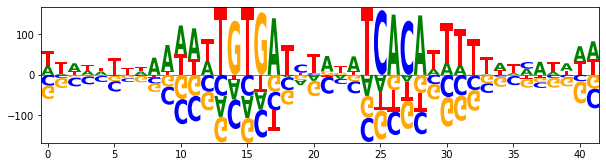

In [28]:
# This counts matrix can be visualized as a sequence logo
logomaker.Logo(counts_mat,center_values=True)

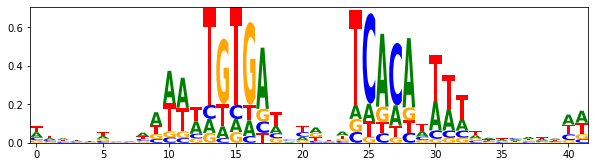

In [29]:
#what we most commonly see in publications are actually "information" logos
info_df = logomaker.transform_matrix(counts_mat,from_type='counts',to_type='information')
logomaker.Logo(info_df)

## Exercises, part 2

**E4.3.** Fill out the function below so that the user can pass the name of any TF and get list of aligned sites back. Test that it works, e.g. on `tf='FNR'`, by getting a list of sites and making an information logo. Also test that it fails when it is supposed to.

In [30]:
# Now let's turn this into a function 
def get_tf_sites(tf):
   
    # Load database
    df = pd.read_csv("data/binding_site_db.txt", sep='\t', comment='#',
                 header=None, usecols=[1,13], names=['tf','site']).dropna()
    
    # 
    # Fill in stuff here
    # 
    
    # Get sequence alignment and return it
    return tf_df['site']


In [31]:
aligned_sites = get_tf_sites('FNR')
#create information logo from retrived aligned sites of FNR

## Part 3

Now that we've went through the basics of dataframe and dataframe subsetting, lets go through a few pandas function that is commonly used for dataframe manipulation. For easiness, we'll do the following parts in the palmer penguine toy dataset

In [43]:
import seaborn as sns
df = load_penguins()
df = df.dropna()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


#### pd.melt()

<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

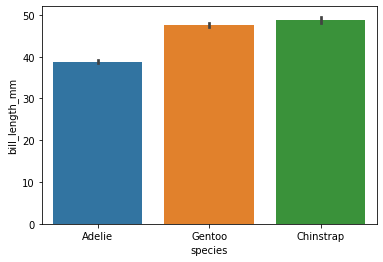

In [44]:
#how we plot the most common bar plot
#You x axis is species, a categorical variable. 
#This means that we can use it to group/seperate the data by species 
sns.barplot(data=df, x='species', y='bill_length_mm')

What if I wanted to compare the distributions of different numerical variables. Say see how bill_length and bill_width compare (not within an observation)? 

To do this you need to make the data "tall" using the function pd.melt()

In [45]:
bills_tall = pd.melt(df[['bill_length_mm', 'bill_depth_mm']])
bills_tall.head()

,variable,value
0,bill_length_mm,39.1
1,bill_length_mm,39.5
2,bill_length_mm,40.3
3,bill_length_mm,36.7
4,bill_length_mm,39.3


In [46]:
bills_tall['variable'].unique()

array(['bill_length_mm', 'bill_depth_mm'], dtype=object)

<AxesSubplot:xlabel='variable', ylabel='value'>

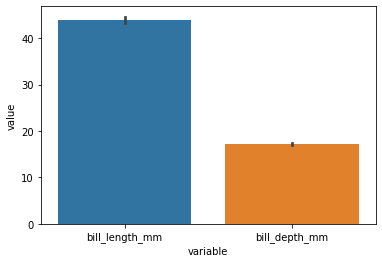

In [47]:
sns.barplot(data=bills_tall,x='variable',y='value')

Now, this is great, but you may notice that we have lost the information about which species each observation came from, when making the data tall, you can add another argument to melt that will bring with each value the species

In [48]:
bills_tall_species = pd.melt(
    df[['bill_length_mm', 'bill_depth_mm', 'species']], id_vars='species', var_name='measurment',value_name='mm')
bills_tall_species.head()

,species,measurment,mm
0,Adelie,bill_length_mm,39.1
1,Adelie,bill_length_mm,39.5
2,Adelie,bill_length_mm,40.3
3,Adelie,bill_length_mm,36.7
4,Adelie,bill_length_mm,39.3


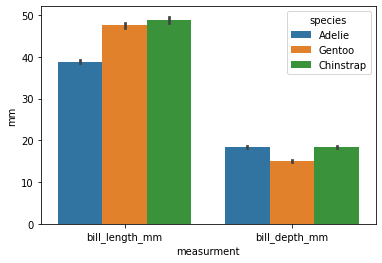

In [49]:
#Next lecture will be on data visulization! 
sns.barplot(data=bills_tall_species, x='measurment', y='mm', hue='species');

#### pd.concat()
It is extremely common for data to come in separate files. But we need to join the files together. To use pd.concat()

In [63]:
sub_df_1 = df.iloc[:,0:4]
sub_df_1.head()

,species,island,bill_length_mm,bill_depth_mm
0,Adelie,Torgersen,39.1,18.7
1,Adelie,Torgersen,39.5,17.4
2,Adelie,Torgersen,40.3,18.0
4,Adelie,Torgersen,36.7,19.3
5,Adelie,Torgersen,39.3,20.6


In [64]:
sub_df_2 = df.iloc[:,4:]
sub_df_2.head()

,flipper_length_mm,body_mass_g,sex,year
0,181.0,3750.0,male,2007
1,186.0,3800.0,female,2007
2,195.0,3250.0,female,2007
4,193.0,3450.0,female,2007
5,190.0,3650.0,male,2007


In [68]:
cat_df = pd.concat([sub_df_1, sub_df_2],axis=1)
cat_df.head()
#The axis=1 tells the function to stick the columns next to eachother, would hstack if we remove it

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


## Part 4

Finally, just a few commonly used statistic tests. Here we'll heavily use the package `scipy`. Its a Python library that have implemented a lot of existing statistic tests.

### Calculating Mann Whitney U test statistic:
 The Mann-Whitney U test is a nonparametric test of the null hypothesis that the distribution underlying sample x is the same as the distribution underlying sample y.

In [50]:
import scipy

adelie_flag = df['species'] == 'Adelie'
gentoo_flag = df['species'] == 'Gentoo'

adelie_bill_l = df[adelie_flag]['bill_length_mm']
gentoo_bill_l = df[gentoo_flag]['bill_length_mm']

scipy.stats.mannwhitneyu(adelie_bill_l, gentoo_bill_l, nan_policy ='omit')

MannwhitneyuResult(statistic=216.0, pvalue=2.021873766800527e-42)

### Calculating correlation coefficients
The Pearson correlation coefficient measures the linear relationship between two datasets.

In [52]:
bill_l = df['bill_length_mm']
body_m = df['body_mass_g']
scipy.stats.pearsonr(bill_l,body_m)

(0.5894511101769491, 1.5386135144860734e-32)

### Calculating P values

We are not going into the complications around p-value. Here I'm just gonna simply show how to do the most simple t-test using python

In [55]:
scipy.stats.ttest_ind(adelie_bill_l, gentoo_bill_l, equal_var=False)

Ttest_indResult(statistic=-24.286066500471392, pvalue=7.821528746388473e-66)